In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
FILE_NAME = 'NYPD_Motor_Vehicle_Collisions.csv'
master_df = pd.read_csv(FILE_NAME)
master_df.head()


FileNotFoundError: File b'NYPD_Motor_Vehicle_Collisions.csv' does not exist

In [ ]:
focus_df = master_df[['DATE', 'NUMBER OF PERSONS INJURED']]
focus_df.head()
focus_df.dtypes

In [14]:
focus_df['dat3'] = [ date[-4:] for date in focus_df['DATE']]
focus_df.dtypes

DATE                          object
NUMBER OF PERSONS INJURED    float64
dat3                          object
dtype: object

In [15]:
focus_df['dat3x'] = [int(date) for date in focus_df['dat3']]

In [6]:
focus_df.head()
focus_df.dtypes

,DATE,NUMBER OF PERSONS INJURED,dat3,dat3x
0,04/30/2019,0.0,2019,2019
1,04/30/2019,0.0,2019,2019
2,04/30/2019,0.0,2019,2019
3,04/30/2019,0.0,2019,2019
4,04/30/2019,0.0,2019,2019


DATE                          object
NUMBER OF PERSONS INJURED    float64
dat3                          object
dat3x                          int64
dtype: object

In [19]:
grp_df = focus_df.groupby('dat3x').sum()
grp_df

,NUMBER OF PERSONS INJURED
dat3x,
2012,27452.0
2013,55124.0
2014,51219.0
2015,51358.0
2016,60304.0
2017,60656.0
2018,61921.0
2019,17558.0


In [17]:
grp_df.sum()

NUMBER OF PERSONS INJURED    385592.0
dtype: float64

In [20]:
grp_df[:-1].sum()
         

NUMBER OF PERSONS INJURED    368034.0
dtype: float64

In [ ]:
brooklyn_2016 = 

### MINIMIZE DATASET WORK WITH FOCUSED

In [32]:
boro_df = master_df[['DATE', 'BOROUGH' ,'UNIQUE KEY']]
# master_df.columns
boro_df.head()

,DATE,BOROUGH,UNIQUE KEY
0,04/30/2019,BROOKLYN,4123208
1,04/30/2019,MANHATTAN,4123128
2,04/30/2019,QUEENS,4124069
3,04/30/2019,QUEENS,4123202
4,04/30/2019,NaN,4123344


In [33]:
boro_df['ye4r'] = [ date[-4:] for date in boro_df['DATE']]
boro_df.head()

,DATE,BOROUGH,UNIQUE KEY,ye4r
0,04/30/2019,BROOKLYN,4123208,2019
1,04/30/2019,MANHATTAN,4123128,2019
2,04/30/2019,QUEENS,4124069,2019
3,04/30/2019,QUEENS,4123202,2019
4,04/30/2019,NaN,4123344,2019


In [37]:
boro_df.dropna(inplace=True)
boro_df.head()

,DATE,BOROUGH,UNIQUE KEY,ye4r
0,04/30/2019,BROOKLYN,4123208,2019
1,04/30/2019,MANHATTAN,4123128,2019
2,04/30/2019,QUEENS,4124069,2019
3,04/30/2019,QUEENS,4123202,2019
8,04/30/2019,MANHATTAN,4123120,2019


In [54]:
boro_df = boro_df[['UNIQUE KEY','BOROUGH', 'ye4r']]
boro_df.head()

,UNIQUE KEY,BOROUGH,ye4r
0,4123208,BROOKLYN,2019
1,4123128,MANHATTAN,2019
2,4124069,QUEENS,2019
3,4123202,QUEENS,2019
8,4123120,MANHATTAN,2019


In [58]:
final_df = boro_df.groupby(['ye4r', 'BOROUGH']).count()
final_df.reset_index(inplace=True)
final_df.head()

,ye4r,BOROUGH,UNIQUE KEY
0,2012,BRONX,9511
1,2012,BROOKLYN,23302
2,2012,MANHATTAN,20720
3,2012,QUEENS,19137
4,2012,STATEN ISLAND,4902


In [73]:
pivot_df = final_df.pivot(
    index = 'ye4r',
    columns = 'BOROUGH',
    values = 'UNIQUE KEY'    
)

In [86]:
pivot_df

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
ye4r,,,,,
2012,9511,23302,20720,19137,4902
2013,19768,47017,41580,39310,8295
2014,19688,47758,41267,41020,6614
2015,21258,50847,42525,42489,6344
2016,21661,47461,36074,41383,6709
2017,21396,44912,31774,38624,6240
2018,23045,47290,31398,41266,6167
2019,7106,13931,8443,12471,1476


Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS'], dtype='object', name='BOROUGH')


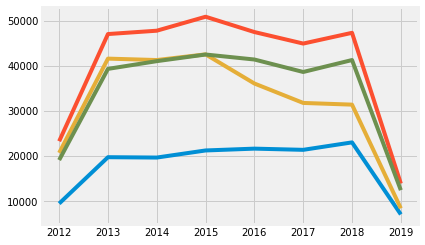

In [77]:
boro_list = pivot_df.columns[:4]
print(boro_list)
for boro in boro_list:
    plt.plot(
    pivot_df.index,
    pivot_df[boro]
    )
plt.show()
    
    

In [93]:
# print only last output 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([-2.,  0.,  2.,  4.,  6.,  8.]), <a list of 6 Text xticklabel objects>)

(array([-2.,  0.,  2.,  4.,  6.,  8.]), <a list of 6 Text xticklabel objects>)

(array([-2.,  0.,  2.,  4.,  6.,  8.]), <a list of 6 Text xticklabel objects>)

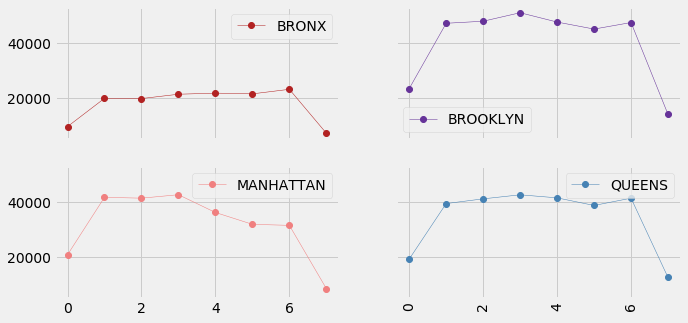

In [96]:
fig, axes = plt.subplots(2,2, figsize=(10, 5), sharex=True,sharey=True)
color_list = [
'firebrick',
'rebeccapurple',
'lightcoral',
'steelblue'
]

plt.xticks(rotation= 90)

for ax, column, color in zip(axes.flatten(), pivot_df.columns, color_list):
# for ax, feature, name in zip(axes.flatten(), data.data.T, data.feature_names):
#     ax.hist(feature, bins=len(np.unique(data.data.T[0]))//2)
    plt.xticks(rotation= 90)
    numPers_list = []
    numPers_list = pivot_df[column].astype(dtype=int, inplace=True)
    ax.plot(list(pivot_df[column]), linewidth=0.5, color = color, marker = 'o', label = column)
    ax.legend(loc = 'best')

plt.show()
fig.savefig('nyc_accidents.png')


In [40]:
import numpy as np
column_count = len(list(master_df.columns))

In [41]:
col_names = list(master_df.columns)
col_index = np.arange(column_count)

In [43]:
desc_df = pd.DataFrame({
    'col_no' : col_index,
    'column_name' : col_names
})

In [50]:
col_first = desc_df['column_name'][0] 
col_first

'DATE'

In [54]:
desc_df
col_second = desc_df['column_name'][2]
col_second

,col_no,column_name
0,0,DATE
1,1,TIME
2,2,BOROUGH
3,3,ZIP CODE
4,4,LATITUDE
5,5,LONGITUDE
6,6,LOCATION
7,7,ON STREET NAME
8,8,CROSS STREET NAME
9,9,OFF STREET NAME


'BOROUGH'

In [57]:
col_third = desc_df['column_name'][10]
col_third

'NUMBER OF PERSONS INJURED'

In [60]:
brook_df = master_df[[col_first, col_second, col_third]]
brook_df.head()

,DATE,BOROUGH,NUMBER OF PERSONS INJURED
0,04/28/2019,BROOKLYN,0.0
1,04/28/2019,QUEENS,0.0
2,04/28/2019,NaN,1.0
3,04/28/2019,QUEENS,0.0
4,04/28/2019,BROOKLYN,0.0


In [65]:
# brook_df['DATE']
brook_df['dat3'] = ''

In [66]:
liste =[]
for date in brook_df['DATE']:
    dat3 = date[-4:]
    liste.append(dat3)
    

In [67]:
brook_df['dat3'] = liste

In [68]:
brook_df.head()

,DATE,BOROUGH,NUMBER OF PERSONS INJURED,dat3
0,04/28/2019,BROOKLYN,0.0,2019
1,04/28/2019,QUEENS,0.0,2019
2,04/28/2019,NaN,1.0,2019
3,04/28/2019,QUEENS,0.0,2019
4,04/28/2019,BROOKLYN,0.0,2019


In [74]:
brook_df['dat3z'] = [ date[-4:] for date in brook_df['DATE']]

In [90]:
brook2016_df = brook_df.loc[brook_df['dat3'] == '2016']

In [101]:
brook2016_df.count()[0]

229788

In [120]:
multi_df = brook2016_df.groupby(['dat3', 'BOROUGH']).count()[['NUMBER OF PERSONS INJURED']]
brookFINAL_df = multi_df.reset_index()
TOTAL2016_INT= brookFINAL_df['NUMBER OF PERSONS INJURED'].sum()
brookFINAL_df['perc3ntage'] = [int(number)/int(TOTAL2016_INT)*100 for number in brookFINAL_df['NUMBER OF PERSONS INJURED']]



In [121]:
brookFINAL_df

,dat3,BOROUGH,NUMBER OF PERSONS INJURED,perc3ntage
0,2016,BRONX,21661,14.130917
1,2016,BROOKLYN,47460,30.961328
2,2016,MANHATTAN,36074,23.533479
3,2016,QUEENS,41384,26.997547
4,2016,STATEN ISLAND,6709,4.376729
